# **Loan Default Prediction**

# Problem statement
•	This project aims to solve an important problem regarding loan default predictions. Currently, loan applications are evaluated manually and could result in errors in judgment. Loans are approved but over time they default causing loss of profits for the bank. This project will convert the manual loan approval process to a more automated process. This is achieved with a Machine learning model that makes robust predictions based on past loan default data.
•	The model is based on the data obtained via the existing loan underwriting process from recent applicants who have been given credit.


## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

### **Import the necessary libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    classification_report,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)


### **Load the dataset**

In [3]:
from google.colab import drive
drive.mount('/content/drive')
learn = pd.read_csv("/content/drive/MyDrive/Content/hmeq.csv")


Mounted at /content/drive


In [4]:
data=learn.copy()

In [5]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Shape of the dataset**

In [7]:
data.shape

(5960, 13)

**Data set has 5960 rows and 13 columns (12 features + 1 target variable)**

### **Data types of the columns**

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights: 2 categorical variables and 11 numerical variables. Many missing values based on Non-Null column. **

### **Check for missing values**

In [9]:
data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [10]:
# Check the percentage of missing values in the each column.
data.isnull().sum()/data.shape[0]*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

**Insights: Many missing values. DEBTINC is 21% missing which is significant. Need to impute data. **

### **Convert the data types to reduce storage requirements**

In [11]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [12]:
cols

['REASON', 'JOB', 'BAD']

In [13]:
for i in cols:
    data[i] = data[i].astype("category")

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Summary Statistics of the dataset**

In [15]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


### Insights: Mean loan amount is 18607, max loan amount is 89900. This information is helpful in estimating potential $ savings based on the prediction model. The DEBTINC (Debt to income ratio) varies widely from min = 0.52 to max = 203.3. This is an indicator of the vast difference in customers’ financial situation.

In [16]:
data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights: For categorical variables, the descriptive summary is below. Each row shows the number of unique values, the top category and count for the same. For the target variable BAD, there are 4771 data points with value =0 which shows that majority of the data points are good loans (the remainder are defaulted loans). **

**Unique values in all the categorical variables**

In [26]:
cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values (%) in',i, 'are :')
    print(data[i].value_counts()/data.shape[0]*100)
    print('*'*40)

Unique values (%) in BAD are :
BAD
0    80.050336
1    19.949664
Name: count, dtype: float64
****************************************
Unique values (%) in REASON are :
REASON
DebtCon    65.906040
HomeImp    29.865772
Name: count, dtype: float64
****************************************
Unique values (%) in JOB are :
JOB
Other      40.067114
ProfExe    21.409396
Office     15.906040
Mgr        12.869128
Self        3.238255
Sales       1.828859
Name: count, dtype: float64
****************************************


**Insights: BAD target variable is inherently imbalanced - this needs to be considered when building models. **

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [ ]:
# study central tendency and dispersion.

def histogram_boxplot(feature, figsize=(9,6), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)},
                                           figsize = figsize
                                           ) # creating the 2 subplots
    sns.boxplot(x=feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

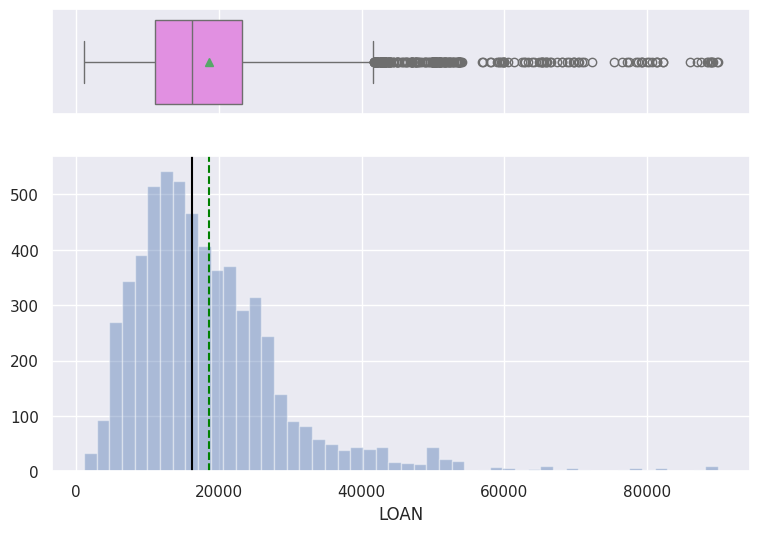

In [ ]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights:Data has many outliers and will need to be treated prior to developing models.**

#### Histogram and Boxplot for other variables

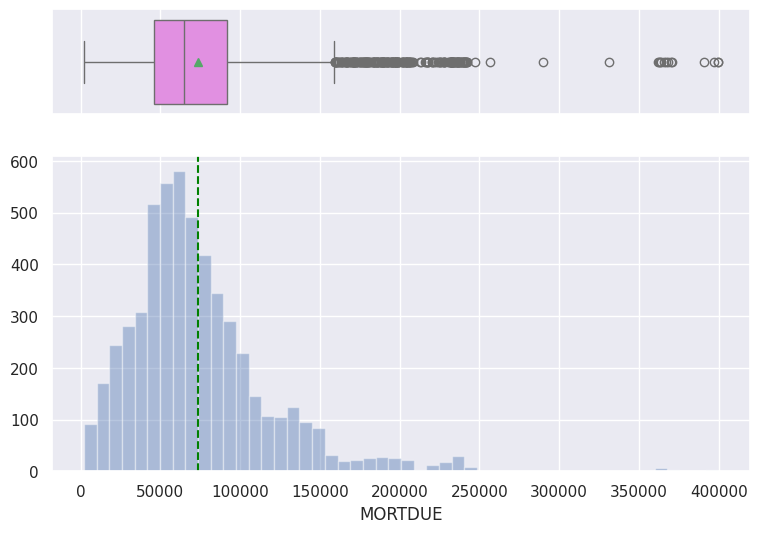

In [ ]:
histogram_boxplot(data['MORTDUE'])

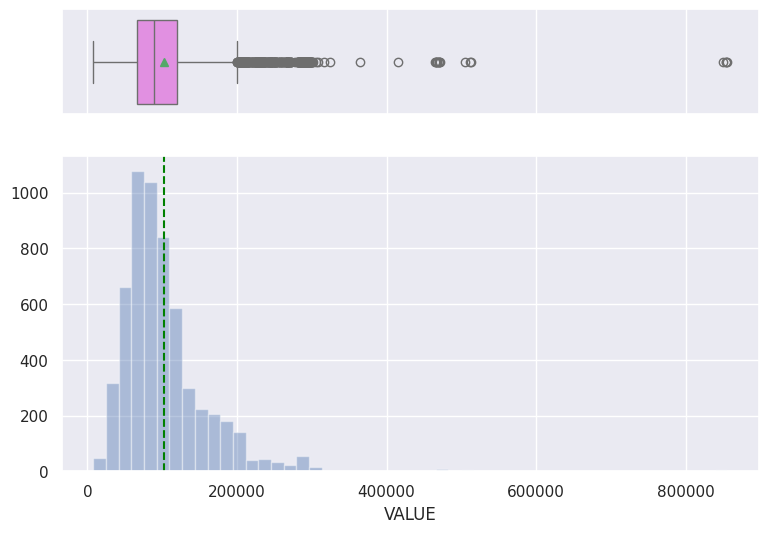

In [ ]:
histogram_boxplot(data['VALUE'])

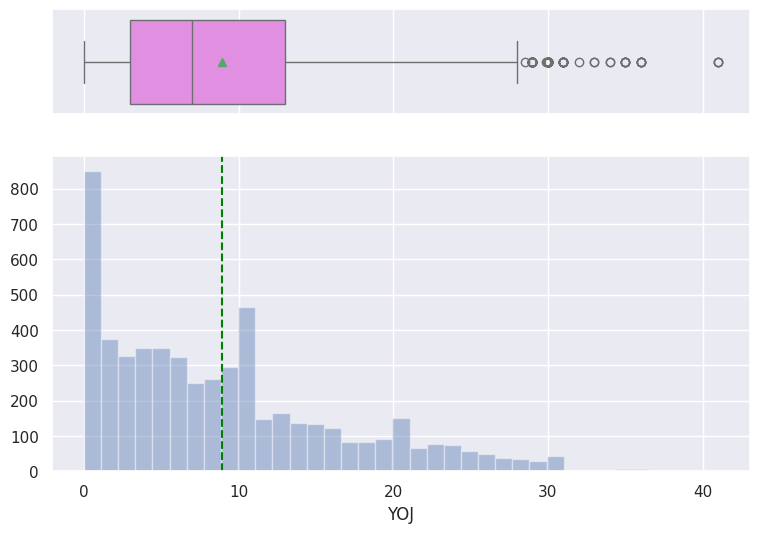

In [ ]:
histogram_boxplot(data['YOJ'])

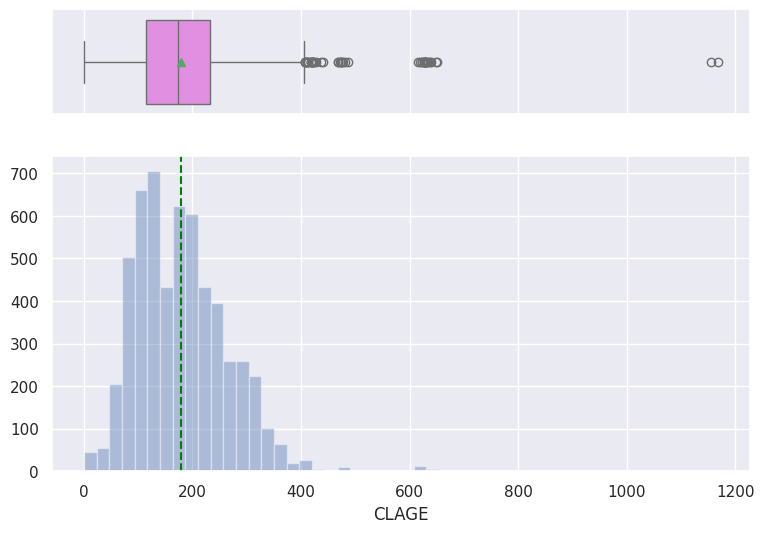

In [ ]:
histogram_boxplot(data['CLAGE'])

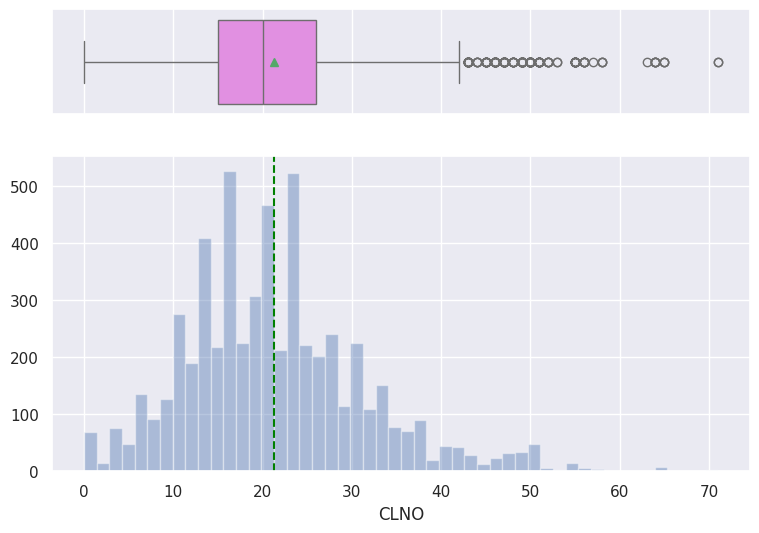

In [ ]:
histogram_boxplot(data['CLNO'])

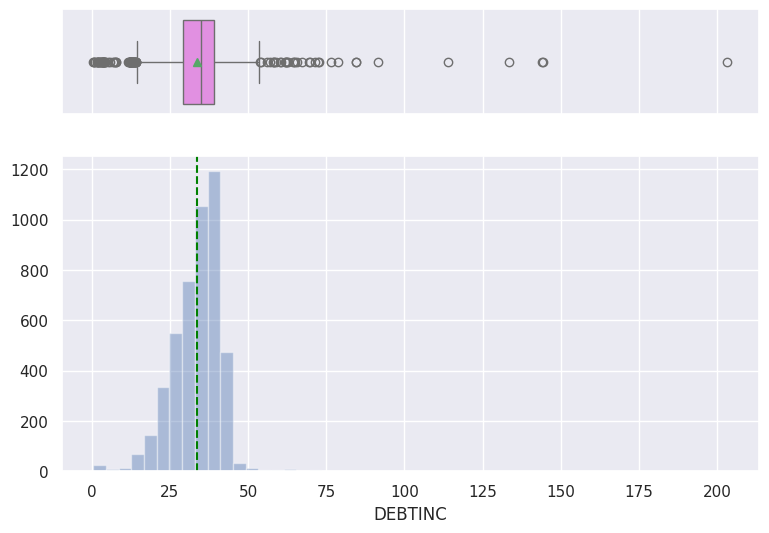

In [ ]:
histogram_boxplot(data['DEBTINC'])

### **2. Univariate Analysis - Categorical Data**

In [ ]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage

    plt.show() # show the plot

#### Analyze Barplot for DELINQ

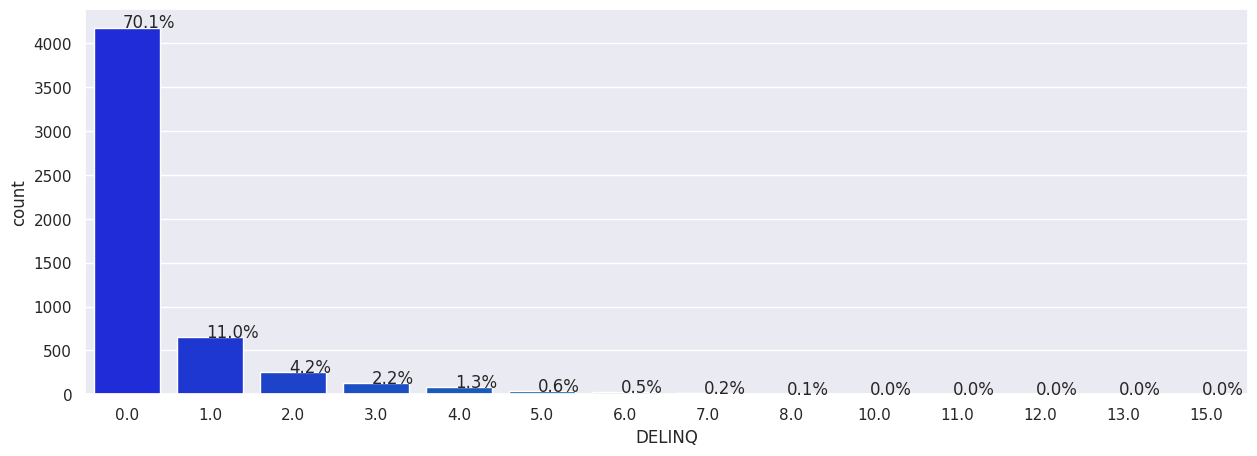

In [ ]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(x=data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

## **Bivariate Analysis**

### **Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<Axes: xlabel='BAD', ylabel='LOAN'>

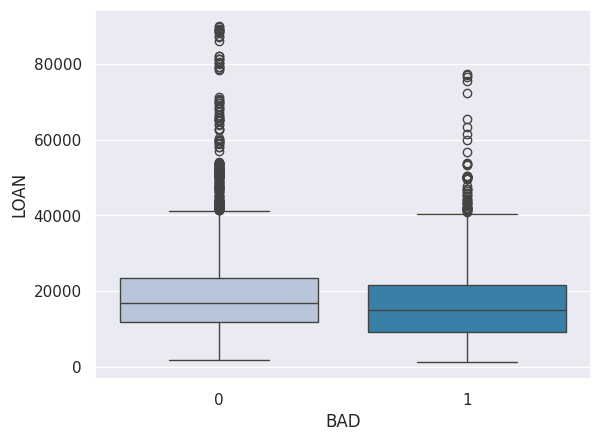

In [ ]:
sns.boxplot(x=data["BAD"],y=data['LOAN'],palette="PuBu")

#### Bi-Variate Analysis on different pair of Categorical and continuous variables

<Axes: xlabel='BAD', ylabel='MORTDUE'>

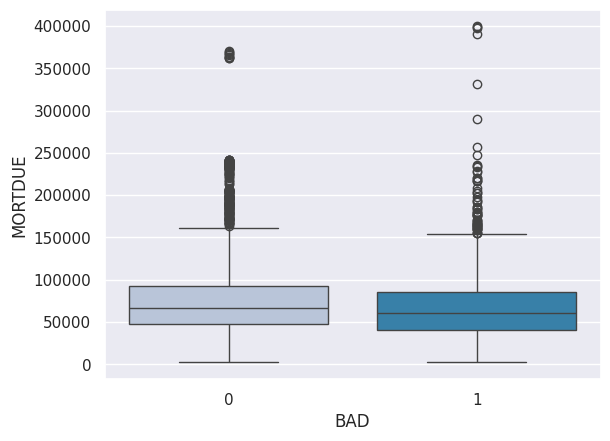

In [ ]:
sns.boxplot(x=data["BAD"],y=data['MORTDUE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='VALUE'>

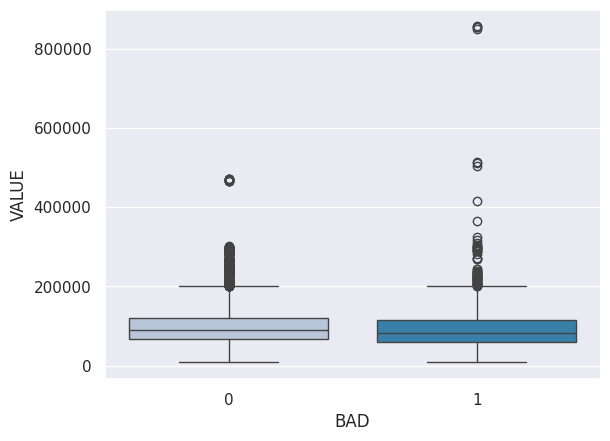

In [ ]:
sns.boxplot(x=data["BAD"],y=data['VALUE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='YOJ'>

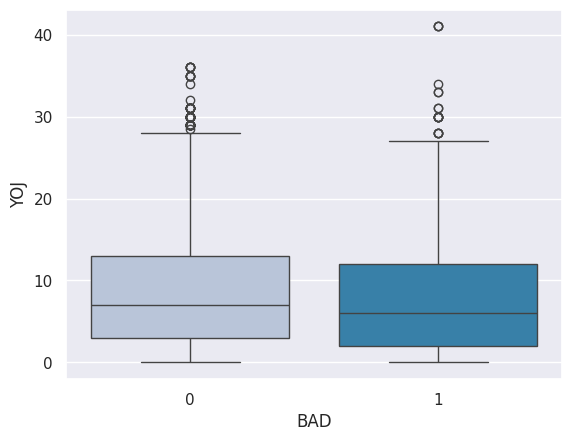

In [ ]:
sns.boxplot(x=data["BAD"],y=data['YOJ'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='CLAGE'>

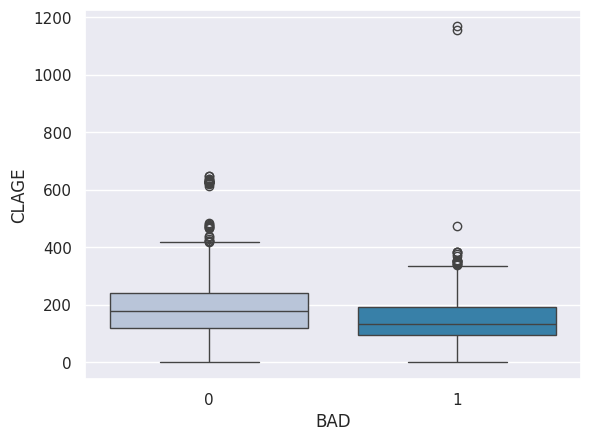

In [ ]:
sns.boxplot(x=data["BAD"],y=data['CLAGE'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='CLNO'>

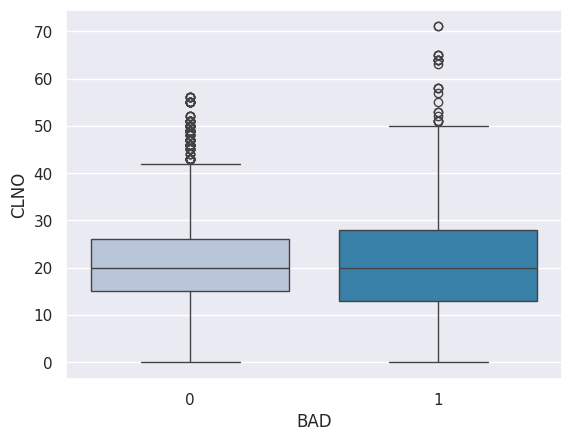

In [ ]:
sns.boxplot(x=data["BAD"],y=data['CLNO'],palette="PuBu")

<Axes: xlabel='BAD', ylabel='DEBTINC'>

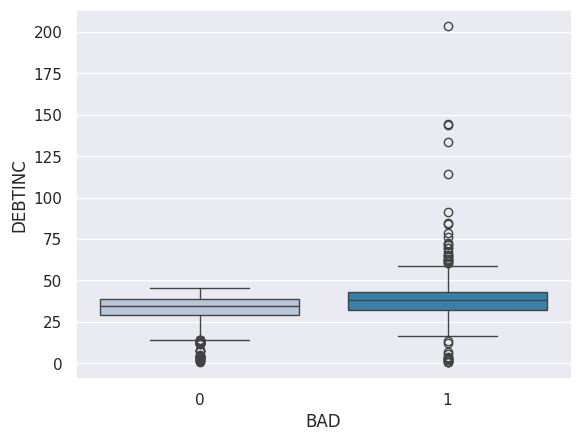

In [ ]:
sns.boxplot(x=data["BAD"],y=data['DEBTINC'],palette="PuBu")

### **Bivariate Analysis: Two Continuous Variables**

**Insights: Most variables do not show a strong relationship with BAD, but it is evident that when DEBTINC increases there is an increase in BAD = 1 i.e. default**

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [ ]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for LOAN and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


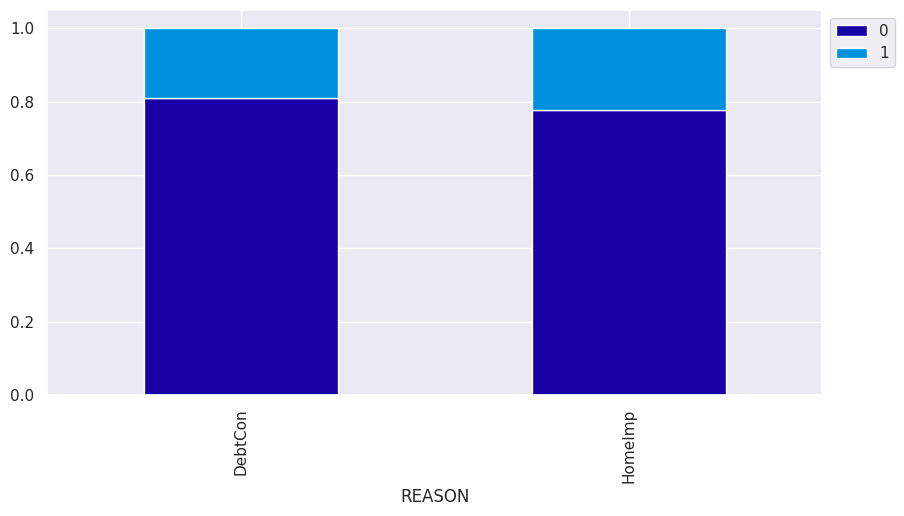

In [ ]:
stacked_plot(data['REASON'])

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


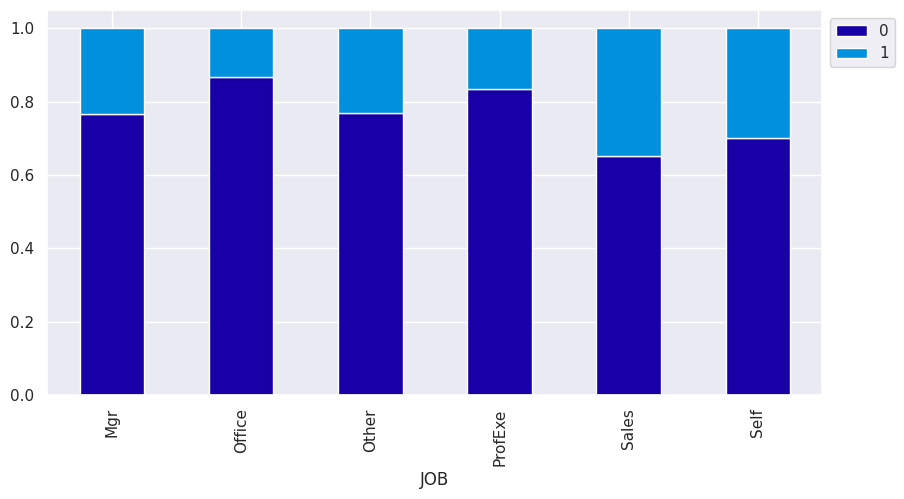

In [ ]:
stacked_plot(data['JOB'])

BAD       0     1   All
DEROG                  
0.0    3773   754  4527
1.0     266   169   435
2.0      78    82   160
3.0      15    43    58
4.0       5    18    23
5.0       8     7    15
6.0       5    10    15
7.0       0     8     8
8.0       0     6     6
9.0       0     3     3
10.0      0     2     2
All    4150  1102  5252
------------------------------------------------------------------------------------------------------------------------


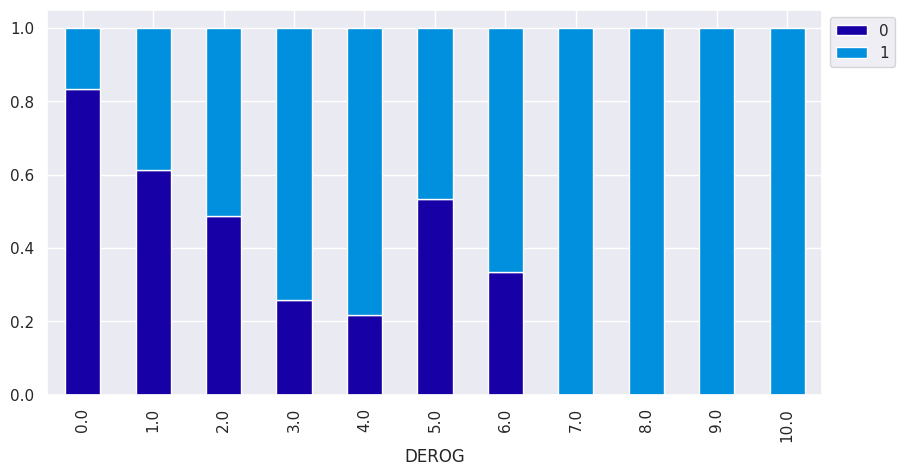

In [ ]:
stacked_plot(data['DEROG'])

BAD        0     1   All
DELINQ                  
0.0     3596   583  4179
1.0      432   222   654
2.0      138   112   250
3.0       58    71   129
4.0       32    46    78
5.0        7    31    38
6.0        0    27    27
7.0        0    13    13
8.0        0     5     5
10.0       0     2     2
11.0       0     2     2
12.0       0     1     1
13.0       0     1     1
15.0       0     1     1
All     4263  1117  5380
------------------------------------------------------------------------------------------------------------------------


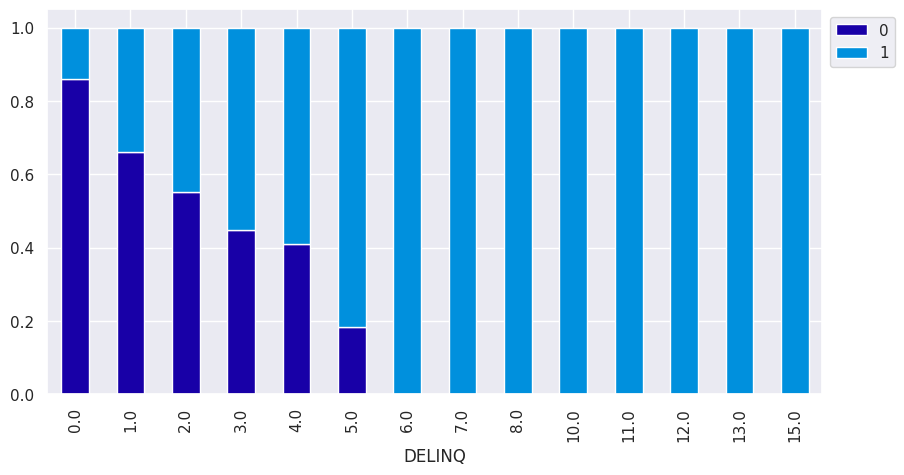

In [ ]:
stacked_plot(data['DELINQ'])

BAD      0     1   All
NINQ                  
0.0   2135   396  2531
1.0   1085   254  1339
2.0    599   181   780
3.0    285   107   392
4.0     95    61   156
5.0     39    36    75
6.0     27    29    56
7.0     29    15    44
8.0     11    11    22
9.0      5     6    11
10.0    19     9    28
11.0     7     3    10
12.0     0     2     2
13.0     0     2     2
14.0     0     1     1
17.0     0     1     1
All   4336  1114  5450
------------------------------------------------------------------------------------------------------------------------


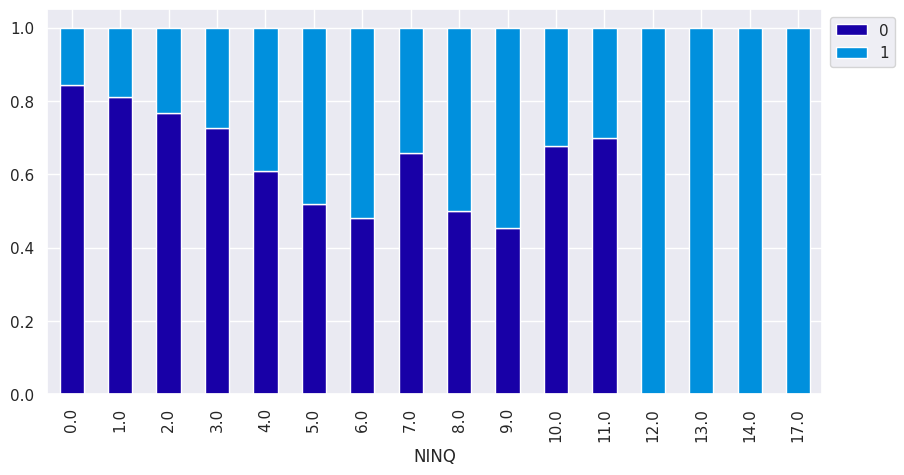

In [ ]:
stacked_plot(data['NINQ'])

**Insights: DELINQ shows a strong relationship with the target variable BAD**

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

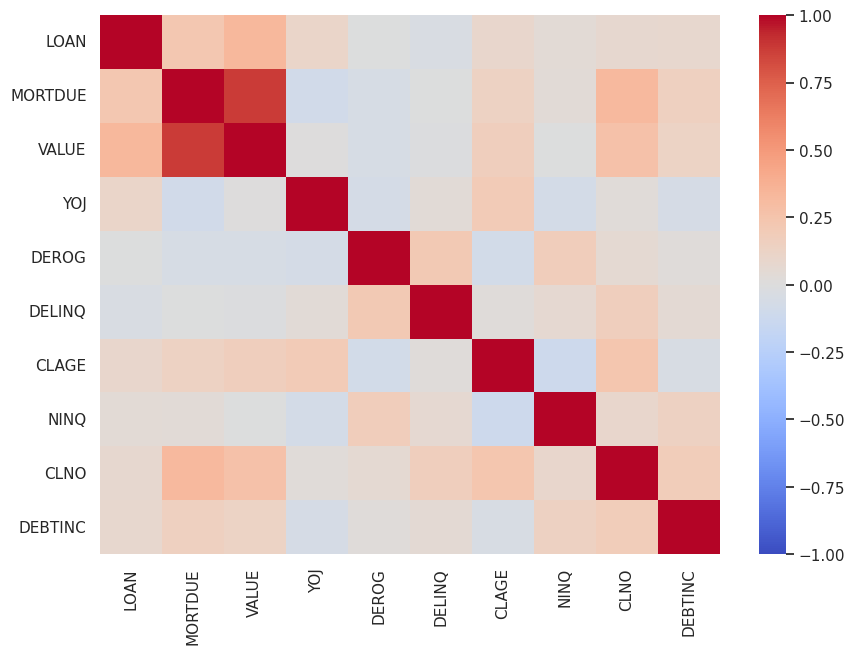

In [ ]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

corr = data[numerical_col].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr,cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

#### Treating Outliers: Convert Outliers to Lower and upper whiskers based on 1.5*IQR

In [ ]:
def treat_outliers(df,col):

    Q1=np.percentile(df[col], 25) # 25th quantile
    Q3=np.percentile(df[col], 75)  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values smaller than Lower_Whisker will be assigned value of Lower_whisker
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker
    return df

def treat_outliers_all(df, col_list):

    for c in col_list:
        df = treat_outliers(df,c)

    return df


In [ ]:
df_raw = data.copy()
numerical_col = df_raw.select_dtypes(include='number').columns.tolist()
df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values

In [ ]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0.
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [ ]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)


#### Filling missing values in numerical columns with median and mode in categorical variables

In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

df[num_data.columns] = num_data.fillna(num_data.median())

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [ ]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,...,VALUE_missing_values_flag,REASON_missing_values_flag,JOB_missing_values_flag,YOJ_missing_values_flag,DEROG_missing_values_flag,DELINQ_missing_values_flag,CLAGE_missing_values_flag,NINQ_missing_values_flag,CLNO_missing_values_flag,DEBTINC_missing_values_flag
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,...,False,False,False,False,False,False,False,False,False,True
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,...,False,False,False,False,False,False,False,False,False,True
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,...,False,False,False,False,False,False,False,False,False,True
3,1,1500,65019.0,89235.5,DebtCon,Other,7.0,0.0,0.0,173.466667,...,True,True,True,True,True,True,True,True,True,True
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,...,False,False,False,False,False,False,False,False,False,True


In [ ]:
df.info() #All missing values have been imputed per table below

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   BAD                          5960 non-null   category
 1   LOAN                         5960 non-null   int64   
 2   MORTDUE                      5960 non-null   float64 
 3   VALUE                        5960 non-null   float64 
 4   REASON                       5960 non-null   category
 5   JOB                          5960 non-null   category
 6   YOJ                          5960 non-null   float64 
 7   DEROG                        5960 non-null   float64 
 8   DELINQ                       5960 non-null   float64 
 9   CLAGE                        5960 non-null   float64 
 10  NINQ                         5960 non-null   float64 
 11  CLNO                         5960 non-null   float64 
 12  DEBTINC                      5960 non-null   float64 
 13  MOR

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [ ]:

X = df.drop(["BAD"], axis=1)
Y = df['BAD']

X = pd.get_dummies(X, drop_first=True)


### **Splitting the data into 80% train and 20% test set**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (4768, 27)
Shape of test set :  (1192, 27)
Percentage of classes in training set:
BAD
0    0.802643
1    0.197357
Name: proportion, dtype: float64
Percentage of classes in test set:
BAD
0    0.791946
1    0.208054
Name: proportion, dtype: float64


## **Model Evaluation Criterion: Recall value is most significant for this problem**


In [ ]:
#creating metric function
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Logistic Regression Model**

              precision    recall  f1-score   support

           0       0.81      1.00      0.89      3827
           1       0.72      0.04      0.07       941

    accuracy                           0.81      4768
   macro avg       0.76      0.52      0.48      4768
weighted avg       0.79      0.81      0.73      4768



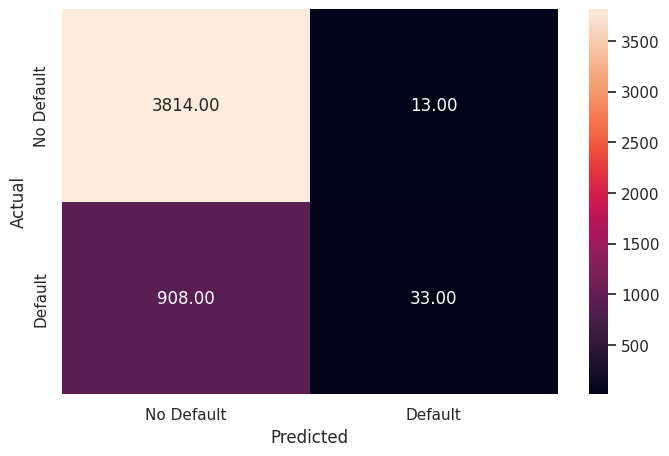

In [ ]:
lg = LogisticRegression()
lg.fit(X_train, y_train)

# Fitting the model on the training data
y_pred_train_lg = lg.predict(X_train)

metrics_score(y_train, y_pred_train_lg)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.79      1.00      0.88       944
           1       0.50      0.01      0.02       248

    accuracy                           0.79      1192
   macro avg       0.65      0.50      0.45      1192
weighted avg       0.73      0.79      0.70      1192



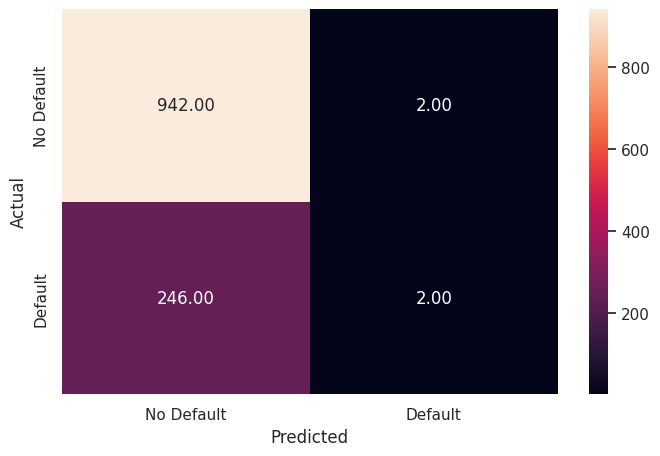

In [ ]:
y_pred_test_lg = lg.predict(X_test)

metrics_score(y_test, y_pred_test_lg)


**Observations: Logistic regression does not perform as well on test set. Very low recall value**

In [ ]:
# Printing the coefficients of logistic regression
cols = X.columns

coef_lg = lg.coef_

pd.DataFrame(coef_lg,columns = cols).T.sort_values(by = 0, ascending = False)

,0
DEBTINC,2.016218e-02
CLNO,7.134627e-03
DELINQ,6.952836e-03
NINQ,4.780207e-03
DEROG,3.988853e-03
DEBTINC_missing_values_flag,3.897541e-03
VALUE_missing_values_flag,6.221599e-04
JOB_Self,1.443743e-04
REASON_HomeImp,1.229553e-04
CLAGE_missing_values_flag,1.177463e-04


### **Decision Tree Model**

#### Data Preparation for the tree based model (outlier treatment not needed for tree based models, missing values are imputed)

In [ ]:
missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)


In [ ]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
num_data = data.select_dtypes('number')

cat_data = data.select_dtypes('category').columns.tolist()

data[num_data.columns] = num_data.fillna(num_data.median())

for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [ ]:
X = data.drop(["BAD"], axis=1)
Y = data['BAD']
X = pd.get_dummies(X, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.20, random_state=1
)


In [ ]:
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



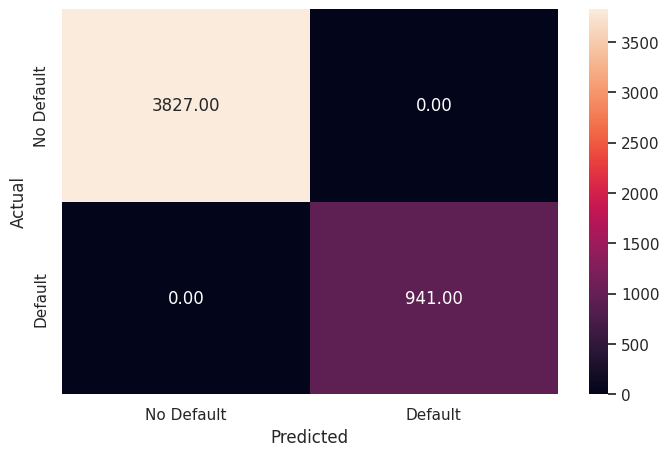

In [ ]:
y_pred_train1 = d_tree.predict(X_train)
metrics_score(y_train, y_pred_train1)

#### Performance on the test dataset

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       944
           1       0.71      0.60      0.66       248

    accuracy                           0.87      1192
   macro avg       0.81      0.77      0.79      1192
weighted avg       0.86      0.87      0.86      1192



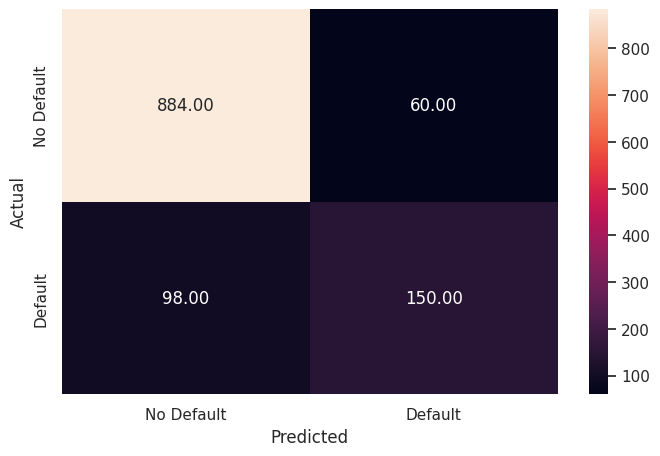

In [ ]:
y_pred_test1 = d_tree.predict(X_test)
metrics_score(y_test, y_pred_test1)

**Insights : Better than Logistic Regression. Not good enough for deployment. **

### **Decision Tree - Hyperparameter Tuning**

* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

#### GridSearchCV for Hyperparameter tuning on the model

In [ ]:
d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.2, 1: 0.8})

parameters = {'max_depth': np.arange(2, 5),
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }
from sklearn.metrics import fbeta_score, make_scorer

scorer = make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

d_tree_tuned = grid_obj.best_estimator_

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, max_depth=3,
                       min_samples_leaf=10, random_state=7)

#### Performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3827
           1       0.57      0.81      0.67       941

    accuracy                           0.84      4768
   macro avg       0.76      0.83      0.78      4768
weighted avg       0.87      0.84      0.85      4768



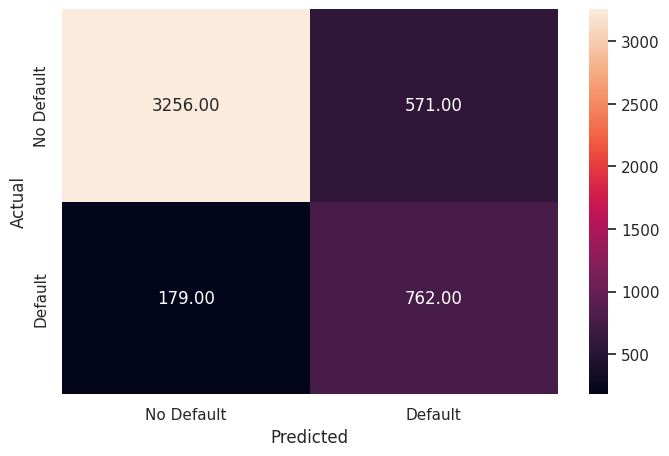

In [ ]:
y_pred_train2 = d_tree_tuned.predict(X_train)
metrics_score(y_train, y_pred_train2)

#### Performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.86      0.89       944
           1       0.59      0.75      0.66       248

    accuracy                           0.84      1192
   macro avg       0.76      0.81      0.78      1192
weighted avg       0.86      0.84      0.85      1192



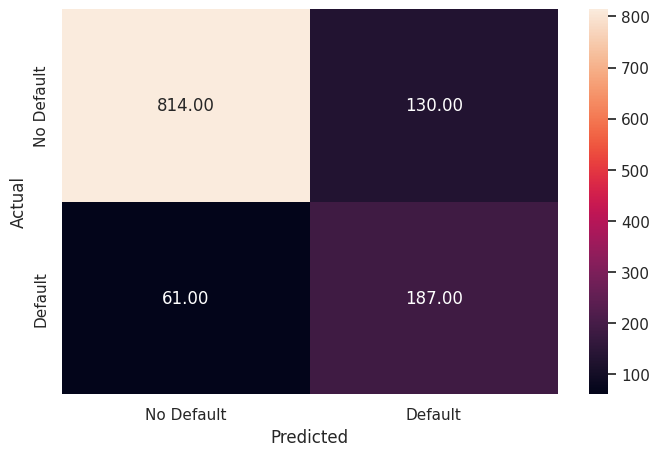

In [ ]:
y_pred_test2 = d_tree_tuned.predict(X_test)
metrics_score(y_test, y_pred_test2)


**Insights: Hyper parameter tuning lead to a better prediction using decision tree **

#### Plotting the Decision Tree

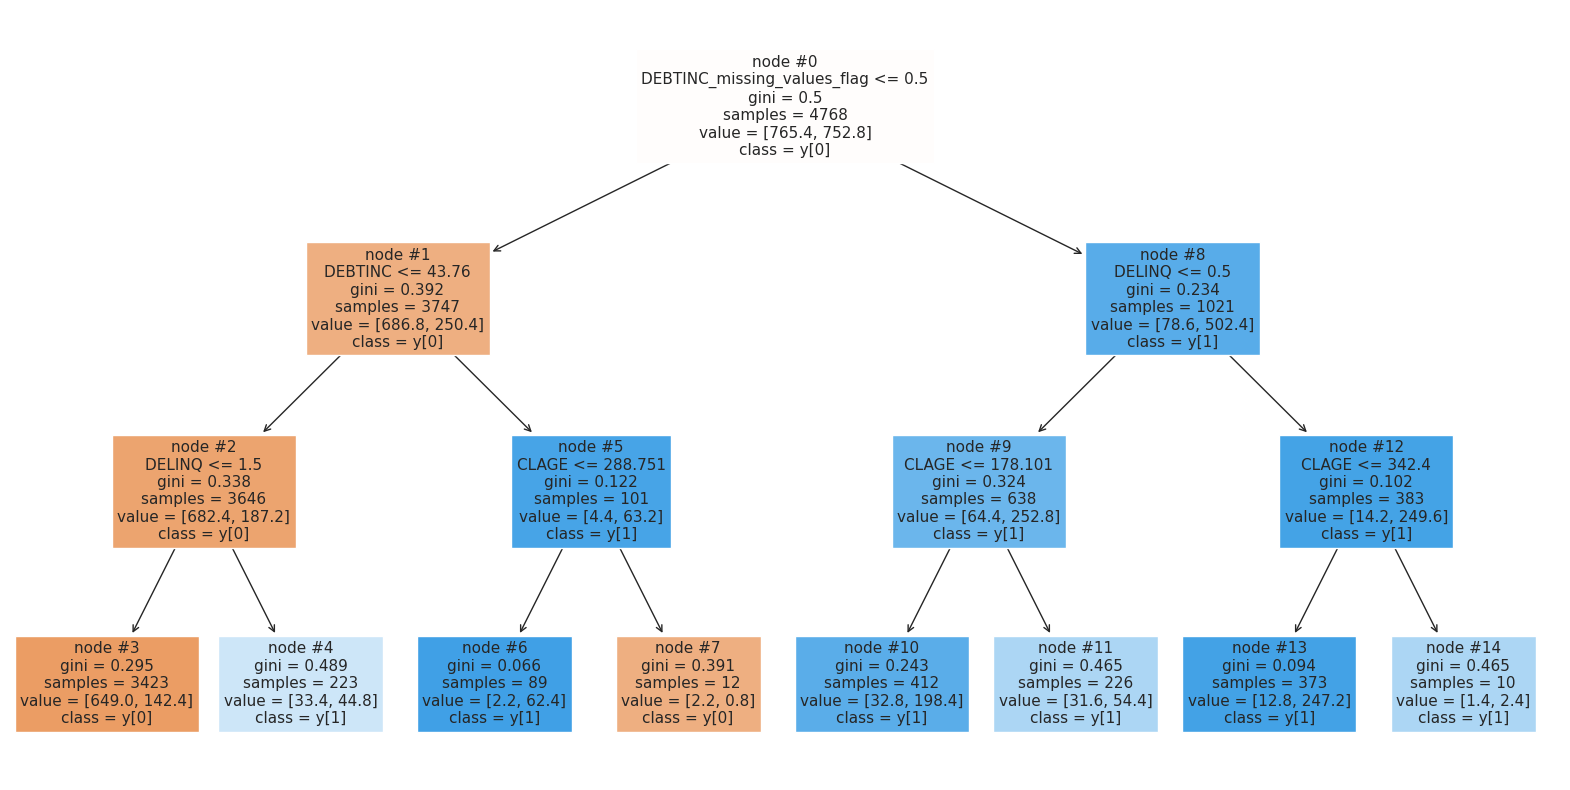

In [ ]:
features = list(X.columns)

plt.figure(figsize = (20, 10))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 11, node_ids = True, class_names = True)

plt.show()

#### Business rules from the Decision Tree: Customers at higher risk of default have 1. Missing Debt to income ratio information, 2. Number of delinquent credit lines > 1, 3. Age of credit lines < 342 months.

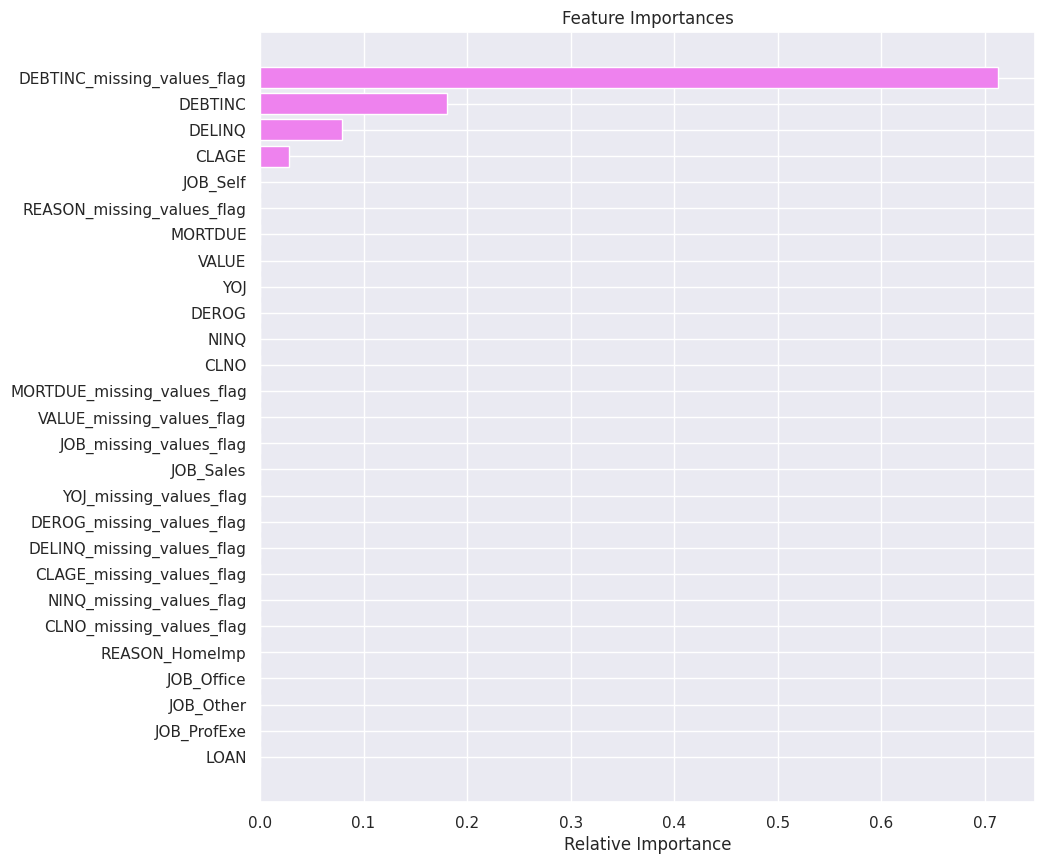

In [ ]:
importances = d_tree_tuned.feature_importances_

indices = np.argsort(importances)

plt.figure(figsize = (10, 10))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [features[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [ ]:
rf_estimator = RandomForestClassifier(random_state = 1)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

#### Performance on the train dataset

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3827
           1       1.00      1.00      1.00       941

    accuracy                           1.00      4768
   macro avg       1.00      1.00      1.00      4768
weighted avg       1.00      1.00      1.00      4768



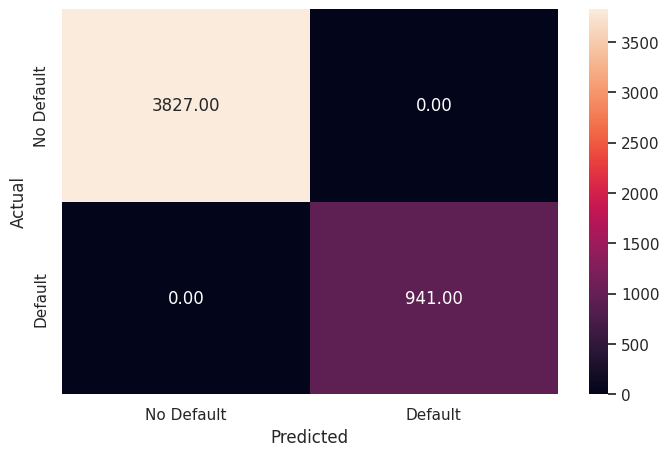

In [ ]:
y_pred_train3 = rf_estimator.predict(X_train)
metrics_score(y_train, y_pred_train3)

#### Performance on the test dataset

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       944
           1       0.86      0.72      0.78       248

    accuracy                           0.92      1192
   macro avg       0.89      0.84      0.87      1192
weighted avg       0.91      0.92      0.91      1192



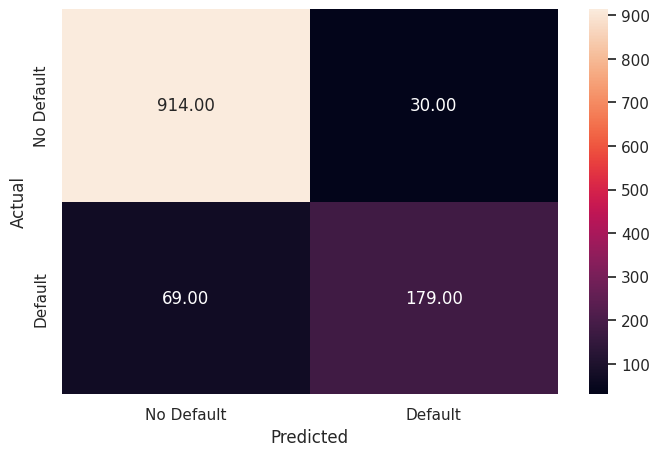

In [ ]:
y_pred_test3 = rf_estimator.predict(X_test)
metrics_score(y_test, y_pred_test3)

### **Tuning the Random Forest**

**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node.

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

In [ ]:
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)

parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7, 8],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.2, 1: 0.8}]
             }

scorer = make_scorer(recall_score, pos_label = 1)

grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)

grid_obj = grid_obj.fit(X_train, y_train)

rf_estimator_tuned = grid_obj.best_estimator_

rf_estimator_tuned.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=0.8, max_samples=0.9,
                       min_samples_leaf=20, n_estimators=120, random_state=7)

#### Performance on the train dataset

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      3827
           1       0.69      0.81      0.74       941

    accuracy                           0.89      4768
   macro avg       0.82      0.86      0.84      4768
weighted avg       0.90      0.89      0.89      4768



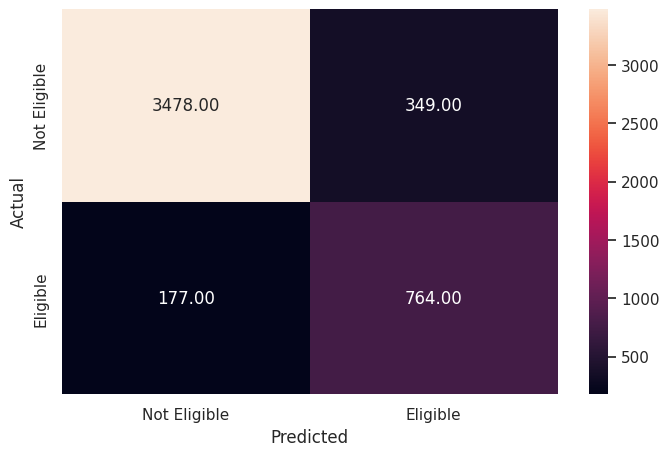

In [ ]:
y_pred_train4 = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train4)

#### Performance on the test dataset


              precision    recall  f1-score   support

           0       0.93      0.91      0.92       944
           1       0.69      0.73      0.71       248

    accuracy                           0.87      1192
   macro avg       0.81      0.82      0.81      1192
weighted avg       0.88      0.87      0.88      1192



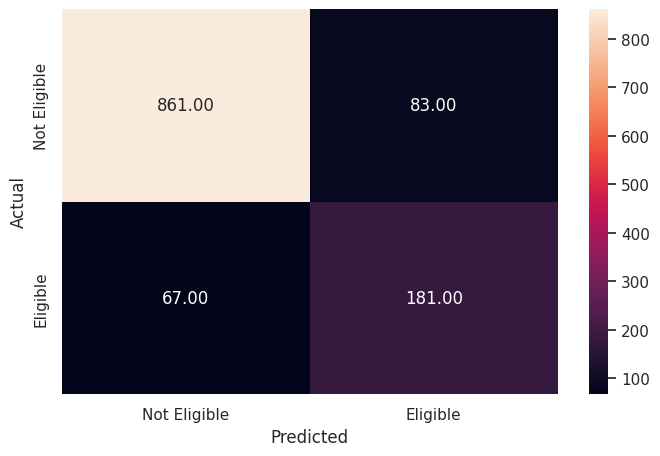

In [ ]:
y_pred_test4 = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test4)

**Insights: Random Forest model gives best recall value**

#### Feature importance of the tuned Random Forest

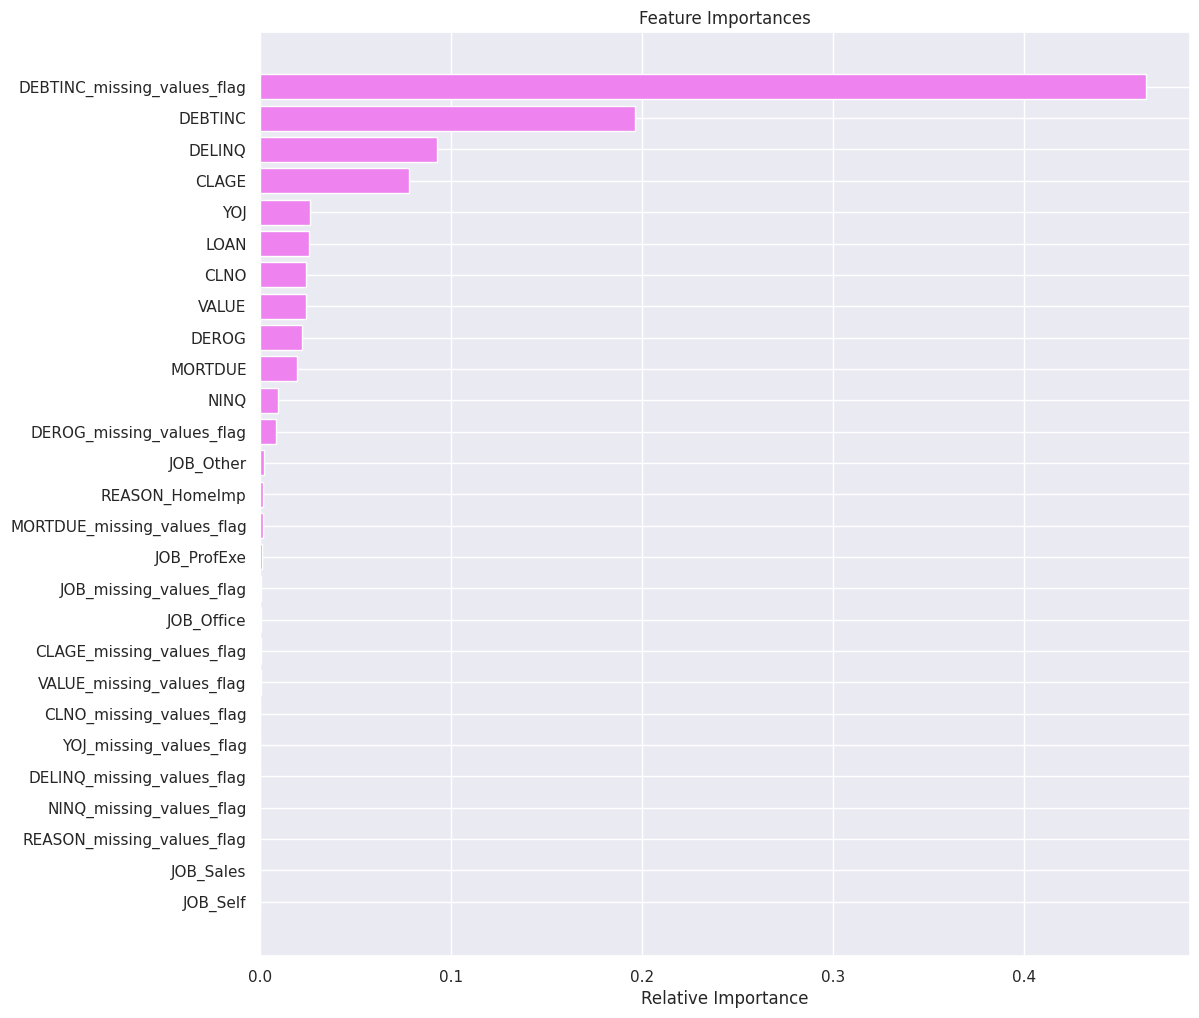

In [ ]:
importances = rf_estimator_tuned.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Comparing Model Performances**

In [ ]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = []
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall)
    a.append(test_recall)

       if flag == True:
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))

    return a # returning the list with train and test scores

In [ ]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision)
    b.append(test_precision)

   if flag == True:
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [ ]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = []
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc)
    c.append(test_acc)

    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))

    return c # returning the list with train and test scores

In [ ]:
# Make the list of all the model names

models = [lg,d_tree,d_tree_tuned,rf_estimator,rf_estimator_tuned]

acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [ ]:
comparison_frame = pd.DataFrame({'Model':["Logistic Regression","Decision tree","Decision tree Tuned","Random Forest","Random forest Tuned"],
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test})
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Logistic Regression,0.806628,0.791946,0.034006,0.008065,0.711111,0.500000
1,Decision tree,1.000000,0.867450,1.000000,0.604839,1.000000,0.714286
2,Decision tree Tuned,0.842701,0.839765,0.809777,0.754032,0.571643,0.589905
3,Random Forest,1.000000,0.914430,1.000000,0.693548,1.000000,0.868687
4,Random forest Tuned,0.889681,0.874161,0.811902,0.729839,0.686433,0.685606


# Insights:
In terms of Recall the best model to use is the Tuned Decision tree model, followed by the tuned Random Forest model. If we look at all 3 metrics - Precision, Recall, and Accuracy - then Random Forest Model does best. Thus, decision can be made with stakeholders about which model to deploy into production.`

- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Perform feature engineering and create model features